In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [35]:
# load history data
boid_poses = np.load('opt_history_pos.npy')
boid_velocities = np.load('opt_history_vel.npy')

N_steps, N_boids = boid_poses.shape[:2]

boid_poses.shape, boid_velocities.shape

((11, 10, 10, 2), (11, 10, 10, 2))

In [36]:
# reshape data
boid_poses = boid_poses.reshape(N_steps, N_boids, -1)
boid_velocities = boid_velocities.reshape(N_steps, N_boids, -1)

boid_poses.shape, boid_velocities.shape

((11, 10, 20), (11, 10, 20))

In [37]:
# dimensionality reduction with PCA

pca = PCA(n_components=2)
boid_poses_2d = pca.fit_transform(boid_poses.reshape(N_steps * N_boids, -1)).reshape(N_steps, N_boids, -1)
boid_velocities_2d = pca.fit_transform(boid_velocities.reshape(N_steps * N_boids, -1)).reshape(N_steps, N_boids, -1)

boid_poses_2d.shape, boid_velocities_2d.shape

((11, 10, 2), (11, 10, 2))

In [38]:
# dataframe building

df = pd.DataFrame({'step': np.repeat(np.arange(N_steps), N_boids),
                   'boid_id': np.repeat(np.arange(N_boids), N_steps).reshape(N_boids, N_steps).T.flatten(),
                   'pca_0': boid_poses_2d[:, :, 0].flatten(),
                   'pca_1': boid_poses_2d[:, :, 1].flatten(),
                   'vel_0': boid_velocities_2d[:, :, 0].flatten(),
                   'vel_1': boid_velocities_2d[:, :, 1].flatten()})
df

,step,boid_id,pca_0,pca_1,vel_0,vel_1
0,0,0,-38.789398,6.170558,-17.949888,-2.087171
1,0,1,32.858690,-0.809278,-17.614537,-2.593260
2,0,2,-10.328965,47.004032,-17.779530,-2.213016
3,0,3,-9.606558,-37.130290,-17.977709,-2.139261
4,0,4,2.517175,-43.097006,-17.343821,-2.061911
...,...,...,...,...,...,...
105,10,5,-6.543576,24.956373,15.845969,-15.922815
106,10,6,24.122520,7.131744,35.190676,-8.696454
107,10,7,-38.495155,-9.630411,2.149871,21.182383
108,10,8,-11.717977,10.312441,20.968054,1.084899


In [39]:
df[df['boid_id'] == 3]

,step,boid_id,pca_0,pca_1,vel_0,vel_1
3,0,3,-9.606558,-37.130290,-17.977709,-2.139261
13,1,3,-9.748640,-36.884505,-14.466678,0.682560
23,2,3,-10.064398,-36.381372,-10.988110,3.475676
33,3,3,-10.550674,-35.625924,-7.576792,6.212155
43,4,3,-11.202606,-34.625714,-4.266837,8.864633
53,5,3,-12.013675,-33.390745,-1.091343,11.406585
63,6,3,-12.975770,-31.933366,1.917933,13.812591
73,7,3,-14.079270,-30.268152,4.730900,16.058591
83,8,3,-15.313139,-28.411753,7.319427,18.122126
93,9,3,-16.665040,-26.382735,9.657629,19.982559


<Axes: xlabel='pca_0', ylabel='pca_1'>

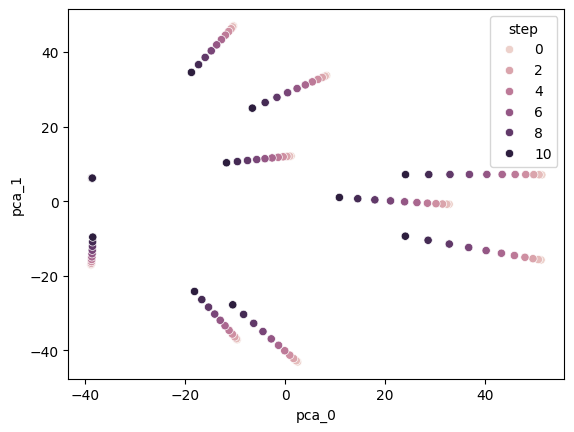

In [40]:
sns.scatterplot(df, x='pca_0', y='pca_1', hue='step')

<Axes: xlabel='vel_0', ylabel='vel_1'>

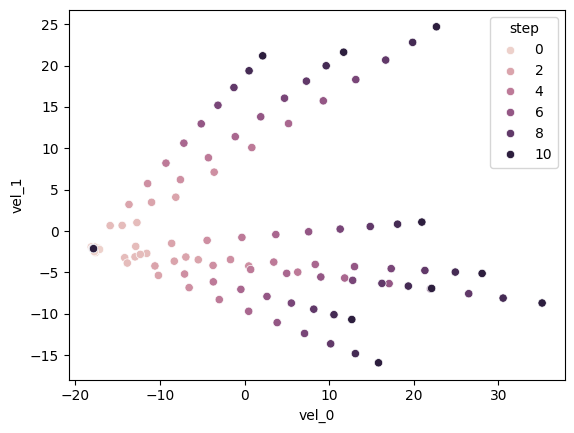

In [41]:
# visualize velocities

sns.scatterplot(df, x='vel_0', y='vel_1', hue='step')